In [1]:
%pwd

'C:\\Users\\PC'

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

# Change the current working directory to a new path
new_directory = "C:\\Users\\PC\\Downloads\\ML1"
os.chdir(new_directory)

# Verify the change
updated_directory = os.getcwd()
print(f"Updated Working Directory: {updated_directory}")


Current Working Directory: C:\Users\PC
Updated Working Directory: C:\Users\PC\Downloads\ML1


In [3]:
## Training and running a linear model using scikit-Learn

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
## Download and Prepare the data

In [6]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv") 

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [7]:
X


array([[26456.38793813],
       [27287.08340093],
       [28384.98778463],
       [29932.49391006],
       [31007.76840654],
       [32181.15453723],
       [32238.15725928],
       [35638.42135118],
       [36215.44759073],
       [36547.73895598],
       [36732.03474403],
       [38341.30757041],
       [38992.14838075],
       [41627.12926943],
       [42025.61737306],
       [42404.39373816],
       [45856.62562648],
       [47260.80045844],
       [48210.03311134],
       [48697.83702825],
       [50683.32350972],
       [50922.35802345],
       [51935.60386182],
       [52279.72885136],
       [54209.56383573],
       [55938.2128086 ],
       [60235.7284917 ]])

In [8]:
y

array([[5.8],
       [5.4],
       [5.5],
       [5.9],
       [5.6],
       [5.4],
       [6.1],
       [5.7],
       [6.3],
       [5.9],
       [5.9],
       [7.2],
       [6. ],
       [6.8],
       [6.5],
       [7.3],
       [7.4],
       [7.6],
       [6.9],
       [7.3],
       [7.3],
       [7. ],
       [7.1],
       [7.5],
       [7.4],
       [7.6],
       [6.9]])

In [9]:
# Visualize the data

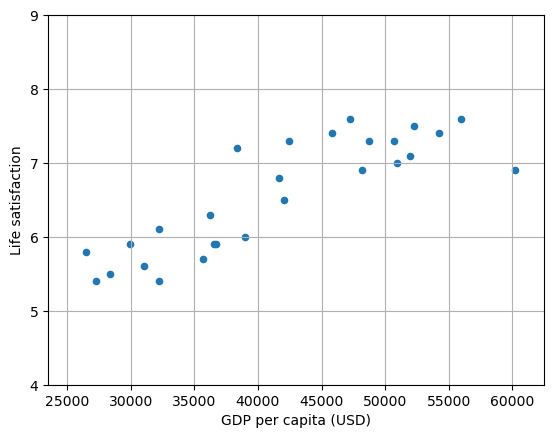

In [10]:
lifesat.plot(kind='scatter', grid=True,
            x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [11]:
# Select a linear model
model = LinearRegression()



In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
## Make a prediction for cyprus

In [22]:
X_new = [[37_655.2]] # Cyprus GDP per capita in 2020
print(model.predict(x_new)) # output 6.30

[[6.33333333]]


In [23]:
## Replacing the linear regression model with k-nearest neighbors regression in the previous code is as easy as replacing these lines:

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
## with these two:

In [26]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

In [27]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]

[[6.33333333]]


In [29]:
## Generating the data and figures - 

In [30]:
# Create a function to save the figures:

In [31]:
from pathlib import Path

In [32]:
## Where to save the figues
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents = True, exist_ok=True)

def savi_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [33]:
## Load and Prepare Life satisfaction data.

In [34]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [37]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath /  "gdp_per_capita.csv")

In [38]:
## Preprocess the GDP per capita data to keep only the year 2020:

In [39]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"]==gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [40]:
## Preprocess the OECD BLI data to keep only the Life satisfaction column:


In [43]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


### Now let's merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns

In [45]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                             left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


### To illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between min_gdp and max_gdp). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [46]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col]>= min_gdp) &
                                  (full_country_stats[gdppc_col]<= max_gdp)]

country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [51]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

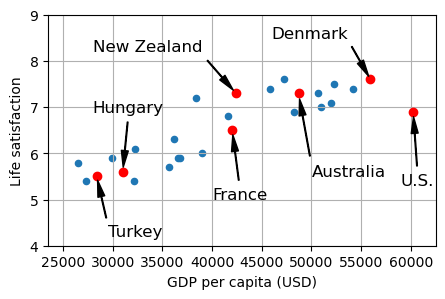

In [53]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

#save_fig('money_happy_scatterplot')
plt.show()


In [54]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


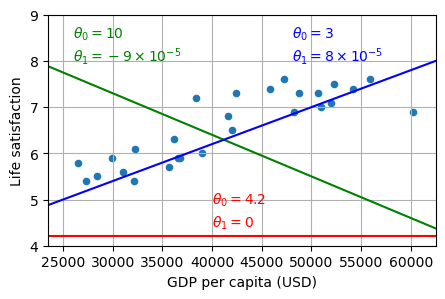

In [56]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

#save_fig('tweaking_model_params_plot')
plt.show()

In [59]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


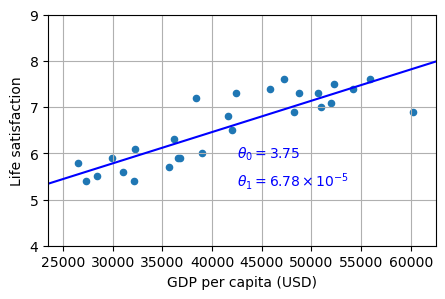

In [61]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

#save_fig('best_fit_model_plot')
plt.show()

In [62]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [63]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738056

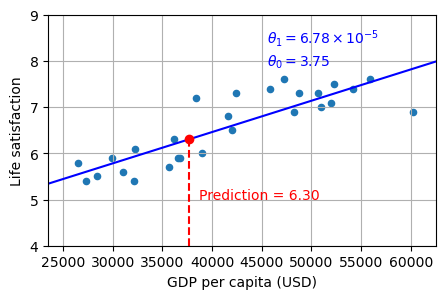

In [65]:
country_stats.plot(kind='scatter', figsize=(5,3), grid=True,
                  x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [66]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [67]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

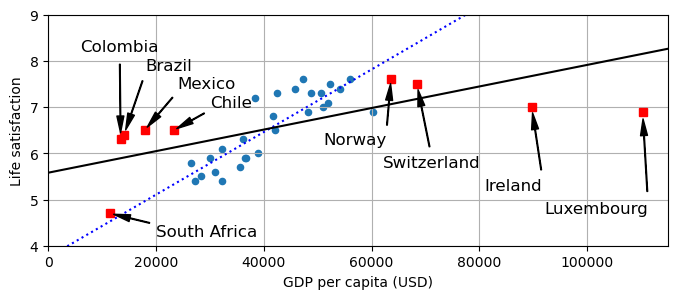

In [69]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

#save_fig('representative_training_data_scatterplot')
plt.show()

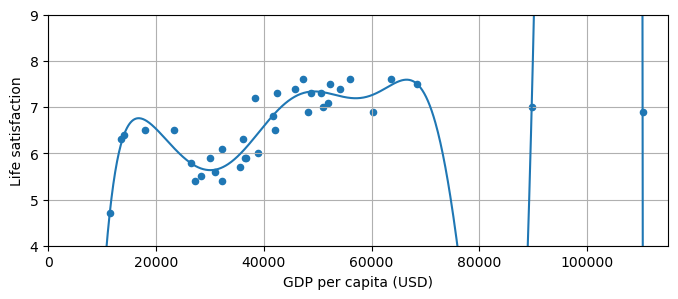

In [71]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

##save_fig('overfitting_model_plot')
plt.show()

In [72]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [73]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


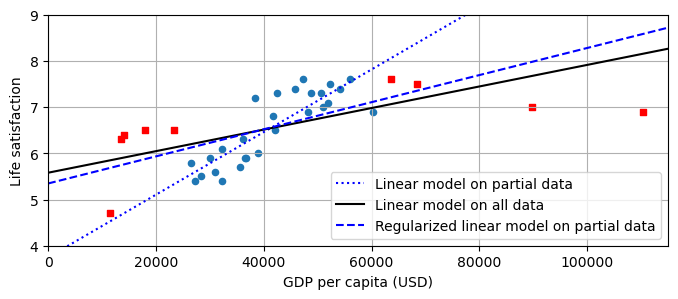

In [74]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

#save_fig('ridge_model_plot')
plt.show()

In [ ]:
## Exercises of the Chapter - 1


## Q1 . How would you define Machine Learning?


Machine Learning can be defined in several ways, but here are a few perspectives that capture its essence:

**1. A data-driven approach:** Machine learning is a field of computer science that focuses on **algorithms that learn from data**. Rather than explicitly programming how to perform a task, these algorithms discover patterns and relationships within data to make predictions and decisions without being explicitly told what to do.

**2. Continuous improvement:** Machine learning algorithms **iteratively improve their performance** as they are exposed to more data. This allows them to adapt to changing circumstances and become more accurate over time.

**3. Automation and generalization:** Machine learning can automate tasks that are complex, time-consuming, or impractical for humans to perform manually. Additionally, trained models can **generalize their knowledge** to new, unseen data, enabling them to handle broader scenarios.

**4. Diverse applications:** Machine learning has a wide range of applications across various domains, including:

* **Predictive analytics:** Forecasting future events or outcomes based on historical data.
* **Computer vision:** Analyzing and understanding images and videos.
* **Natural language processing:** Extracting meaning from text and speech.
* **Recommender systems:** Personalizing recommendations for products, services, or content.
* **Fraud detection:** Identifying suspicious activity and patterns.

**Here are some additional points to consider:**

* Machine learning is not simply about memorizing data. It involves **identifying underlying patterns and relationships** that can be applied to new situations.
* While powerful, machine learning models can also be susceptible to biases present in the data they are trained on. It's crucial to consider the ethical implications and potential limitations of these models.

I hope this explanation provides a comprehensive definition of machine learning and its key characteristics. Please let me know if you have any further questions!


## 2. Can you name four types of problems where it shines?


Machine learning can shine in tackling various challenges, but here are four specific types of problems where it truly excels:

**1. Prediction and forecasting:**

* **Demand forecasting:** Predicting future demand for products or services to optimize inventory management and resource allocation.
* **Financial market analysis:** Identifying patterns and trends in financial data to predict market movements and make informed investment decisions.
* **Anomaly detection:** Detecting unusual patterns or deviations from expected behavior in data streams, flagging potential issues for early intervention.
* **Disease outbreak prediction:** Analyzing historical data and real-time information to predict and prevent the spread of infectious diseases.

**2. Image and video recognition:**

* **Facial recognition:** Automatically identifying individuals in images and videos, used for security applications, personalized content delivery, and more.
* **Medical image analysis:** Assisting doctors in diagnosing diseases by analyzing medical scans and identifying abnormalities.
* **Self-driving cars:** Recognizing objects and navigating roads safely through computer vision algorithms.
* **Content moderation:** Automatically detecting and removing inappropriate content from images and videos on social media platforms.

**3. Natural language processing:**

* **Machine translation:** Automatically translating text from one language to another, breaking down language barriers and facilitating communication.
* **Sentiment analysis:** Understanding the emotional tone and sentiment expressed in text, valuable for customer feedback analysis and market research.
* **Chatbots and virtual assistants:** Powering conversational AI systems that can understand and respond to user queries and instructions in a natural way.
* **Text summarization:** Automatically generating concise summaries of long documents, saving time and improving information access.

**4. Personalization and recommendation:**

* **Personalized product recommendations:** Suggesting products or services to users based on their individual preferences and past behavior.
* **Targeted advertising:** Delivering targeted advertisements to users based on their interests and demographics, increasing advertising effectiveness.
* **Content personalization:** tailoring content such as news articles or music recommendations to individual users' preferences.
* **Fraud detection:** Identifying fraudulent transactions or activities by analyzing user behavior and financial data patterns.

These are just a few examples, and the potential applications of machine learning are constantly evolving. As machine learning techniques continue to advance, we can expect it to play an even more significant role in solving complex problems across diverse fields.



## 3. What is a labeled training set?

A labeled training set in machine learning is a crucial component used to train supervised learning models. It's essentially a collection of input data samples, each paired with a corresponding output label or target value. 

Here's a breakdown of its key features:

**1. Input Data Samples:** These are the individual pieces of information your model will learn from. They can be various types of data, including images, text, numerical values, sensor readings, or any combination of these.

**2. Output Labels:** Each data sample is associated with a specific label or target value. These labels tell the model what the desired outcome for each sample is. In an image classification task, the labels might be the object categories (e.g., "cat", "dog", "car"). In a sentiment analysis task, the labels might be positive, negative, or neutral.

**3. Ground Truth:** The labels represent the "ground truth" – the ideal or correct output for each sample. This allows the model to learn the relationship between the input data and the desired output.

**4. Training the Model:** Supervised learning models analyze the labeled training set to identify patterns and relationships between the input features and the corresponding labels. Through iterative training processes, the model learns to map the input data to the correct output labels.

**5. Importance of Quality:** The quality and composition of the labeled training set significantly impact the performance of the trained model. It's crucial to ensure the data is:

* **Large enough:** More data generally leads to more accurate and robust models.
* **Representative:** The data should reflect the real-world scenario where the model will be deployed.
* **Accurate:** Labels should be correctly assigned to each data point.
* **Diverse:** The data should encompass a variety of examples to capture the full range of potential inputs the model might encounter.

**In summary, labeled training sets provide the foundational data for supervised learning models, allowing them to learn and make predictions on new, unseen data with improved accuracy.**




## 4. What are the two most common supervised tasks?


In the realm of supervised learning, two tasks reign supreme due to their versatility and widespread applications:

**1. Classification:** This task involves assigning a data point to a specific category or class based on its characteristics. It's like sorting objects into different bins based on their properties. Imagine training a model to classify images of animals into "cat," "dog," "bird," etc. 

Classification problems can be further categorized based on the number of possible classes:

* **Binary classification:** Only two possible classes exist (e.g., spam email vs. not spam).
* **Multi-class classification:** There are three or more distinct classes (e.g., classifying handwritten digits).

**2. Regression:** This task focuses on predicting continuous numerical values based on the relationships learned from the training data. Think of it like drawing a line through a scatter plot that best captures the trend between the input features and the desired output values. A common example is predicting housing prices based on factors like size, location, and amenities.

Here's a table summarizing the key differences:

| Task | Goal | Output | Example |
|---|---|---|---|
| Classification | Assign category | Discrete label ("cat", "dog", etc.) | Image recognition, spam filtering |
| Regression | Predict numerical value | Continuous value (housing price, temperature) | Sales forecasting, weather prediction |

These two tasks hold immense potential across various domains, making them the most frequently encountered supervised learning practices. 




In [ ]:
## 5. Can you name four common unsupervised tasks?

While supervised learning shines with labeled data, unsupervised learning navigates the world of unlabeled data using different strategies. Here are four common unsupervised tasks:

**1. Clustering:** This task involves grouping data points with similar characteristics, forming natural clusters within the data. It's like automatically sorting apples, oranges, and bananas into separate baskets based on their shared features (color, shape, etc.). Applications include customer segmentation, market research, and anomaly detection.

**2. Dimensionality Reduction:** Imagine you have a huge dataset with many features, making it unwieldy to analyze. Dimensionality reduction aims to find a smaller set of new features that capture the essential information within the original data, essentially simplifying its representation without significant loss of information. This is useful for visualization, data compression, and improving the performance of other algorithms.

**3. Association Rule Learning:** This task uncovers hidden relationships and patterns between items within a dataset. It aims to identify rules like "customers who buy bread also frequently buy milk." This is valuable for market basket analysis, recommendation systems, and identifying correlations in complex data sets.

**4. Anomaly Detection:** In a world of regular patterns, sometimes things stand out as unusual. Anomaly detection identifies data points that deviate significantly from the expected behavior or patterns learned from the unlabeled data. This is crucial for fraud detection, system failure prediction, and identifying outliers in scientific experiments.

These are just some examples, and unsupervised learning holds immense potential for exploring and understanding data without prior knowledge or specific labels. Do you have any particular task or application in mind where you'd like to know more about how these unsupervised techniques can be applied?


## 6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

While there are multiple options to consider, **reinforcement learning (RL)** is probably the most suitable type of machine learning algorithm for enabling a robot to walk in various unknown terrains. Here's why:

**Reasons for using reinforcement learning:**

* **Unknown environment:** Since the terrain is unknown, traditional supervised learning approaches relying on pre-labeled data become ineffective. RL, however, allows the robot to learn through trial and error in the actual environment, making it ideal for unpredictable situations.
* **Adaptation to different terrains:** RL algorithms excel at adapting to diverse situations. As the robot interacts with the terrain, it receives feedback (rewards or penalties) based on its movement. This feedback helps it learn optimal walking strategies for different types of ground, slopes, obstacles, etc.
* **Continuous improvement:** Unlike other algorithms that might get stuck in local optima, RL encourages continuous improvement. The robot constantly explores new walking patterns and refines its behavior based on the latest feedback, enabling it to navigate increasingly complex terrains.

**Additional points to consider:**

* **Specific RL algorithms:** While RL is the overarching type, specific algorithms within it might be more suitable depending on the robot's capabilities and the complexity of the terrain. Examples include Deep Q-learning, Proximal Policy Optimization (PPO), and Deterministic Policy Gradients (DPG).
* **Simulation and real-world training:** Combining simulated environments with real-world testing can accelerate the learning process. The robot can initially learn basic walking principles in a simulated environment and then refine its skills in the actual terrain, minimizing risks and maximizing efficiency.
* **Sensor data and feedback:** The quality of sensor data (from vision, LIDAR, etc.) and the design of the reward/penalty system are crucial for effective RL training. Accurate feedback ensures the robot learns the desired behaviors.

In conclusion, **reinforcement learning** stands out as the most promising type of machine learning algorithm for enabling robots to walk in unknown terrains. Its ability to adapt, learn through trial and error, and continuously improve makes it ideal for navigating these unpredictable environments.



### 2nd Ans of the Question------


Choosing the ideal machine learning algorithm for a robot walking on unknown terrain depends on several factors, including:

**1. Sensor data:** What type of sensors are available on the robot (e.g., cameras, LIDAR, force sensors)? This determines the input data the algorithm can utilize.

**2. Terrain complexity:** How diverse and unpredictable are the potential terrains? Does the robot need to handle stairs, rocks, slopes, or even water? 

**3. Real-time vs. planning:** Should the algorithm make real-time decisions for each step or plan a complete path beforehand?

**4. Computational resources:** What processing power and memory are available on the robot? Some algorithms require more resources than others.

Based on these factors, here are three potential machine learning approaches for this challenging task:

**1. Reinforcement Learning:**

* This method is well-suited for unpredictable environments because the robot learns through trial and error. 
* The robot receives rewards for successful locomotion and penalties for mistakes.
* Algorithms like Deep Q-learning or Proximal Policy Optimization (PPO) can be used to train the robot to adapt its walking gait in real-time based on sensor feedback.
* Requires a robust simulation environment or controlled physical space for initial training.

**2. Model-Based Learning:**

* This approach involves building a physical or mathematical model of the robot and its surrounding environment.
* The model is then used to predict the consequences of different actions and choose the one that optimizes some reward function, like stability or energy efficiency.
* Algorithms like Gaussian Process Regression or Monte Carlo Tree Search can be used for planning optimal trajectories.
* Requires accurate modeling of the robot and its dynamics, which can be complex.

**3. Hybrid approaches:**

* Combining reinforcement learning with model-based methods can leverage the strengths of both.
* Reinforcement learning can fine-tune the model's predictions based on real-world experience, while the model can help guide the robot's exploration and decision-making.
* This is a promising area of research with many potential advantages.

Ultimately, the best algorithm for your specific robot and terrain will depend on your specific needs and constraints. However, the approaches mentioned above are all actively researched and show significant promise in enabling robots to navigate diverse and challenging environments.

Do you have any further details about the specific robot and terrain you're interested in? This would help me provide a more specific recommendation for the most suitable machine learning algorithm.


### ---3rd Ans 

To enable a robot to walk in various unknown terrains, you would typically employ a type of machine learning algorithm known as Reinforcement Learning (RL). Reinforcement Learning is a branch of machine learning where an agent learns to make decisions by interacting with an environment. The agent takes actions, receives feedback in the form of rewards or penalties, and learns to optimize its behavior over time.

For walking in unknown terrains, RL can be used to train the robot to adapt its walking patterns based on the feedback it receives from the environment. The environment in this case would represent the different types of terrains the robot might encounter.

Key components of a Reinforcement Learning approach for robot walking include:

1. **Agent:** The robot, which takes actions (e.g., adjusting leg movements) to navigate the terrain.

2. **State:** The current state of the robot and the environment, which is essential for decision-making. It includes information such as the robot's position, orientation, and any sensors data.

3. **Action:** The set of possible actions the robot can take in a given state, such as adjusting leg positions, speed, or direction.

4. **Reward:** The feedback the robot receives after taking an action in a specific state. Rewards are used to guide the learning process, encouraging the robot to learn behaviors that lead to positive outcomes.

5. **Policy:** The strategy or set of rules that the robot learns to follow, determining its actions in different states.

Training a robot to walk in various terrains using RL involves iteratively allowing the robot to explore the environment, receive feedback, and adjust its behavior to maximize cumulative rewards over time. The algorithm learns a policy that helps the robot adapt to different terrains and navigate efficiently.

It's important to note that the complexity of the task may require more advanced RL techniques, such as deep reinforcement learning (DRL), where neural networks are used to approximate the policy or value functions. This allows the robot to learn complex and high-dimensional representations of the environment.

## Q 7. What type of algorithm would you use to segment your customers into multiple groups

## 1st Answer--
To segment customers into multiple groups, you would typically use a clustering algorithm. Clustering is an unsupervised learning technique that groups similar data points together based on certain features or characteristics. One popular algorithm for customer segmentation is the **K-Means Clustering** algorithm. Here's a brief overview of how you might use K-Means for customer segmentation:

1. **Data Collection and Preparation:**
   - Gather relevant data about your customers, such as demographic information, purchase history, online behavior, etc. Prepare the data by cleaning, normalizing, and handling any missing values.

2. **Feature Selection:**
   - Choose the features (attributes) that will be used for clustering. These features should be relevant to the segmentation goals.

3. **Choosing the Number of Clusters (K):**
   - Decide on the number of segments or clusters you want to create. This could be based on business knowledge, or you can use methods like the elbow method or silhouette analysis to determine an optimal value for K.

4. **Applying K-Means Clustering:**
   - Run the K-Means algorithm on the selected features with the chosen value of K. The algorithm will assign each customer to one of the clusters based on the similarity of their features.

5. **Analyzing and Interpreting Results:**
   - Examine the characteristics of each cluster to understand the common traits or behaviors of customers within each group. This analysis can provide insights into the preferences and needs of different customer segments.

6. **Iterative Refinement (Optional):**
   - Depending on the results, you may need to iteratively refine the segmentation by adjusting the features or the number of clusters. This process helps improve the meaningfulness of the segments.

It's worth noting that besides K-Means, other clustering algorithms like hierarchical clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), or Gaussian Mixture Models can also be used, depending on the nature of the data and the goals of segmentation.

Customer segmentation through clustering allows businesses to tailor their marketing strategies, product offerings, and customer interactions to better meet the specific needs and preferences of each identified segment.

## ---- 2 nd Ans
Choosing the right algorithm for customer segmentation depends on several factors, primarily:

**1. Type of data available:**

* **Do you have pre-labeled data:** If you have data with existing labels for each customer based on their segment (e.g., high-spending, budget-conscious), you can use **supervised learning** algorithms like K-means clustering, decision trees, or support vector machines (SVMs).
* **No pre-labeled data:** If you don't have pre-existing labels, you can use **unsupervised learning** algorithms like hierarchical clustering, density-based spatial clustering of applications with noise (DBSCAN), or anomaly detection.

**2. Segmentation goal:**

* **Behavioral groups:** Identify similar customer behaviors like purchase frequency, product preferences, or engagement metrics. Use algorithms that capture these similarities, like K-means or DBSCAN.
* **Descriptive groups:** Understand and describe distinct customer profiles based on demographics, psychographics, or other attributes. Hierarchical clustering or anomaly detection could be helpful here.
* **Predictive groups:** Predict future behavior or response to campaigns based on segmentation. Use supervised learning algorithms like decision trees or SVMs trained on labeled data with known outcomes.

**3. Desired number of segments:**

* **Predetermined number:** If you have a specific number of segments in mind, K-means with pre-defined cluster count or hierarchical clustering with controlled merging can be appropriate.
* **Data-driven number:** If the number of segments should be derived from the data, DBSCAN or other density-based methods can dynamically discover clusters.

**Here's a quick overview of potential algorithms based on these factors:**

| Data Availability | Segmentation Goal | Desired Number of Segments | Potential Algorithms |
|---|---|---|---|
| Pre-labeled | Behavioral | Predetermined | K-means, decision trees, SVMs |
| Pre-labeled | Behavioral | Data-driven | Hierarchical clustering, DBSCAN |
| Pre-labeled | Descriptive | Any | K-means, hierarchical clustering, anomaly detection |
| Pre-labeled | Predictive | Any | Decision trees, SVMs |
| No labels | Behavioral | Predetermined | K-means, DBSCAN |
| No labels | Behavioral | Data-driven | Hierarchical clustering, DBSCAN |
| No labels | Descriptive | Any | Hierarchical clustering, anomaly detection |

Ultimately, the best algorithm depends on your specific data, goals, and desired outcomes. If you provide more details about your customer data and segmentation objectives, I can help you narrow down the best options and suggest suitable approaches.

Remember, there's no "one size fits all" solution, so choosing the right algorithm is crucial for successful customer segmentation and extracting valuable insights from your data.



## Q8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?


## Ans - 1

Spam detection is typically framed as a supervised learning problem. In a supervised learning approach, the algorithm is trained on a labeled dataset where each example is associated with a class label (spam or not spam). The model learns to distinguish between spam and non-spam messages based on the features present in the training data.

Supervised learning is effective for spam detection because it leverages the labeled examples to learn patterns and relationships between the features and the corresponding class labels. Common supervised learning algorithms for spam detection include support vector machines (SVM), decision trees, and neural networks.

On the other hand, unsupervised learning is not commonly used for spam detection because it does not rely on labeled data. Unsupervised learning methods, such as clustering, are more suitable for tasks where the goal is to discover patterns or group similar data points without predefined class labels.

In summary, spam detection is generally approached as a supervised learning problem to take advantage of labeled data for training accurate and effective models.

## Ans --2
The problem of spam detection is most effectively framed as a **supervised learning problem**. Here's why:

**Reasons for using supervised learning:**

* **Classification task:** Spam detection involves classifying emails as either spam or non-spam (ham). This is a classic binary classification problem, a core strength of supervised learning.
* **Labeled data availability:** To train a supervised learning model for spam detection, we need a large dataset of labeled emails. Fortunately, email providers (like Gmail) have vast amounts of data classified by users as spam or ham, which can be used for training.
* **Model learning capacity:** Supervised learning allows models to learn from labeled examples and identify patterns that distinguish spam from ham emails. These patterns can include sender information, keywords, language usage, and email formatting.
* **Performance measurement:** The effectiveness of spam detection models can be easily measured using metrics like accuracy, precision, and recall. This allows us to compare different algorithms and optimize performance.

While unsupervised learning might seem appealing due to the ever-evolving nature of spam techniques, it has limitations:

* **Lack of labels:** Unsupervised learning requires unlabeled data, which is less readily available or reliable for this task. Misclassified emails in the training data can mislead the model.
* **Difficulty in interpretation:** Unsupervised algorithms can identify clusters of emails based on unknown features, making it harder to understand why specific emails are classified as spam.
* **Adaptation to new tactics:** Supervised models can be continuously updated with labeled examples of new spam tactics, allowing them to adapt and maintain high accuracy.

Therefore, while both supervised and unsupervised learning techniques have their roles in text analysis, **supervised learning offers the most effective and practical approach for spam detection** due to its reliance on labeled data, proven classification capabilities, and ability to adapt to evolving spam tactics.

If you'd like to explore further, I can discuss specific supervised learning algorithms used for spam detection and their advantages and disadvantages!


## Q9. What is an online learning system? in machine learning.

In machine learning, there are two main approaches to learning: **batch learning** and **online learning**. They differ in how they utilize data and update models.

**Batch learning**, the more traditional approach, works with the entire dataset at once. It trains the model by iterating through the entire dataset multiple times, updating the model parameters with each pass. While effective for static datasets, batch learning can be inefficient for:

* **Large datasets:** Processing the entire dataset multiple times can be computationally expensive and time-consuming.
* **Dynamic data:** If the data changes over time, the model won't adapt unless retrained entirely with the new data.

**Online learning**, on the other hand, addresses these limitations by processing data **incrementally, one at a time**. As each data point arrives, the model updates its parameters immediately based on the new information. This approach offers several advantages:

* **Efficiency:** Processing data point by point reduces computational cost and training time, especially for large datasets.
* **Adaptability:** The model continuously updates with new information, making it ideal for dynamic data streams or rapidly changing environments.
* **Real-time applications:** Online learning enables real-time predictions and decision-making, essential for applications like fraud detection, stock market analysis, and robot control.

However, online learning also has some drawbacks:

* **Memory requirements:** Storing and processing data points individually can put pressure on memory resources.
* **Parameter instability:** Constant updates due to each data point can lead to unstable model parameters, especially for small datasets.
* **Convergence challenges:** Ensuring the model converges to an optimal solution can be trickier in online learning compared to batch learning.

Despite these challenges, online learning is a powerful tool for various applications. Popular examples include:

* **Recommendation systems:** Online learning updates recommendations based on user interactions in real-time.
* **Fraud detection:** Models adapt to new fraud patterns as they appear in transaction data.
* **Time series forecasting:** Online learning continuously updates predictions based on incoming data points.

When choosing between online and batch learning, consider the size and dynamism of your data, desired model update frequency, and computational resources available.




## Q10 . What is out-of-core learning? in machine Learning.

Out-of-core learning is a technique in machine learning that allows you to train models on datasets that cannot fit entirely in the main memory (RAM) of a single computer. This becomes crucial when dealing with **extremely large datasets**, often exceeding terabytes in size.

Here's how it works:

* **Data chunking:** The massive dataset is divided into smaller chunks that can fit in the available RAM.
* **Incremental training:** Each chunk is loaded into memory and used to train the model for a specific number of iterations.
* **Model updates:** The model parameters are updated based on the learning from the current chunk.
* **Discard and repeat:** After processing the chunk, it's discarded from memory, and the next chunk is loaded for training. This process continues until all chunks have been processed.

**Benefits of out-of-core learning:**

* **Handles large datasets:** It allows you to train models on massive datasets that would otherwise be impossible to handle on a single machine.
* **Cost-effective:** Utilizing existing hardware resources instead of investing in high-end machines with massive RAM saves cost.
* **Scalability:** Out-of-core algorithms can be easily scaled to larger datasets by increasing the number of machines or processing power.

**Challenges of out-of-core learning:**

* **Performance:** Frequent data loading and unloading can be slower than processing data entirely in memory.
* **Algorithmic limitations:** Not all machine learning algorithms are readily adaptable to out-of-core implementations.
* **Complexity:** Implementing and optimizing out-of-core algorithms can be more complex than traditional in-memory training.

**Examples of out-of-core learning applications:**

* **Recommender systems for large user bases**
* **Natural language processing tasks with massive text datasets**
* **Image and video analysis with high-resolution data**
* **Scientific computing with complex simulations**

Overall, out-of-core learning is a powerful technique that enables you to tackle massive datasets and unlock valuable insights from them. However, it's important to consider the challenges and limitations before implementing it in your projects.




## Q11. What type of learning algorithm relies on a similarity measure to make predictions?

The type of learning algorithm that relies on a similarity measure to make predictions is an **instance-based learning** algorithm. 

Here's why:

* **Focus on similarity:** Instance-based algorithms store all training data points in memory. When presented with a new data point, they compare it to existing points using **similarity measures** like Euclidean distance, cosine similarity, or Jaccard similarity.
* **Prediction based on neighbors:** The algorithm identifies the k nearest neighbors to the new data point based on the chosen similarity measure. These neighbors are assumed to be the most relevant to the new point.
* **Prediction from neighbors:** Depending on the task, the algorithm can make predictions about the new data point in different ways:
    * **Classification:** The majority class among the k nearest neighbors determines the predicted class for the new point.
    * **Regression:** The average value of the k nearest neighbors for the target variable becomes the predicted value for the new point.
    * **Other tasks:** Similar approaches can be used for tasks like anomaly detection or clustering.

Some commonly used instance-based learning algorithms include:

* **k-Nearest Neighbors (k-NN):** This is the most popular instance-based algorithm, where k determines the number of neighbors used for prediction.
* **Support Vector Machines (SVMs):** While often categorized as a different type of algorithm, SVMs can be implemented in an instance-based way, using kernel functions to measure similarity.
* **Locally Weighted Regression (LWR):** This algorithm assigns weights to neighbors based on their distance from the new point, giving more importance to closer neighbors for prediction.

**Advantages of instance-based learning:**

* **Simple and intuitive:** The concept of using similar neighbors for prediction is easy to understand.
* **No model training required:** Unlike other algorithms that require explicit model building, instance-based algorithms simply store the training data.
* **Flexible for various tasks:** They can be used for both classification and regression, as well as other tasks with appropriate adaptations.

**Disadvantages of instance-based learning:**

* **High memory requirements:** Storing all training data in memory can be computationally expensive, especially for large datasets.
* **Sensitivity to irrelevant features:** Features that are irrelevant to the task but affect similarity measures can mislead the algorithm.
* **Computational cost of prediction:** Finding nearest neighbors can be computationally expensive for large datasets.

Overall, instance-based learning algorithms are a powerful tool for tasks where similarity plays a crucial role in prediction. Their simplicity, flexibility, and lack of explicit model training make them attractive for various applications. However, their resource demands and sensitivity to irrelevant features should be considered when choosing this approach.



## Q12.  What is the difference between a model parameter and a learning algorithm’s hyperparameter?

The distinction between a model parameter and a learning algorithm's hyperparameter is crucial in machine learning. While both influence the final outcome, they differ in terms of their origin, function, and how they're set.

**Model Parameters:**

* **Origin:** Are **learned** from the training data during the training process.
* **Function:** Directly influence the model's predictions or outputs.
* **Setting:** Automatically adjusted by the chosen learning algorithm to minimize the error between the model's predictions and the actual data.
* **Examples:** In linear regression, the slope and intercept are model parameters; in a neural network, they are the weights and biases associated with each node.

**Hyperparameters:**

* **Origin:** Are **manually specified** before training the model.
* **Function:** Control the learning process itself, influencing the model's learning capacity, complexity, and performance.
* **Setting:** Chosen based on prior knowledge, domain expertise, or experimentation to optimize the model's performance on the task at hand.
* **Examples:** In k-Nearest Neighbors, the number of neighbors (k) is a hyperparameter; in neural networks, the learning rate, network architecture, and number of hidden layers are hyperparameters.

Here's an analogy to understand the difference:

* **Think of a model parameter as the chef's recipe.** It contains the specific instructions (weights, biases) for preparing a dish (prediction).
* **Think of a hyperparameter as the cooking temperature.** It affects how the recipe (learning process) unfolds, ultimately influencing the quality and taste of the dish (model performance).

**Key Differences:**

| Feature | Model Parameter | Hyperparameter |
|---|---|---|
| Origin | Learned from data | Set manually |
| Function | Influences predictions | Controls learning process |
| Setting | Automatic | Manual |
| Example | Weights, biases | Learning rate, network architecture |

Ultimately, both model parameters and hyperparameters play vital roles in machine learning. Understanding their differences helps you optimize your model and achieve the desired results.




## Q13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Model-based learning algorithms in machine learning are all about finding the **optimal settings for a pre-defined model** that best describes the underlying relationship between your data points. They excel at tasks where this relationship can be expressed as a mathematical function or equation.

Here's a breakdown of their key aspects:

**1. What they search for:**

* **Optimal model parameters:** These parameters define the specific details of the chosen model (e.g., weights in a linear regression or coefficients in a polynomial equation).
* **Minimum cost or error:** Model-based algorithms aim to minimize a cost function or error metric that quantifies the discrepancy between the model's predictions and the actual data.

**2. Common strategies for success:**

* **Gradient descent:** This iterative technique adjusts the model parameters in the direction that minimizes the cost function, gradually "climbing down" the error landscape towards the optimal settings.
* **Newton-Raphson method:** This approach uses the curvature of the cost function to make quicker jumps towards the minimum, but requires more complex calculations.
* **Expectation-maximization (EM) algorithm:** Used for models with hidden variables, it iteratively alternates between estimating the hidden variables and updating the model parameters based on these estimates.

**3. How they make predictions:**

* Once the optimal model parameters are found, they are plugged into the chosen model.
* When presented with new data points, the model uses these parameters to generate predictions according to its mathematical function or equation.

**Examples of model-based learning algorithms:**

* **Linear regression:** Finds the relationship between a single dependent variable and one or more independent variables through a linear equation.
* **Logistic regression:** Models the probability of an event occurring based on several factors, used for binary classification tasks.
* **Support vector machines (SVMs):** Find a hyperplane that optimally separates different classes in data, used for both classification and regression.
* **Neural networks:** Complex models with interconnected layers that learn complex relationships from data, suitable for various tasks including image recognition and natural language processing.

**Strengths of model-based learning:**

* **Interpretability:** The model parameters offer some insights into the nature of the relationship between the variables.
* **Efficient for small datasets:** Training can be relatively fast with manageable data sizes.
* **Generalization:** Can perform well on unseen data due to their focus on capturing underlying relationships.

**Weaknesses of model-based learning:**

* **Sensitivity to model assumptions:** Choosing the right model type is crucial, as mismatched assumptions can lead to poor performance.
* **Overfitting:** Can memorize training data without properly generalizing to unseen examples.
* **Computationally expensive:** Training complex models with many parameters can be computationally intensive.

**Overall, model-based learning algorithms provide a powerful way to understand and predict complex relationships in data. Their reliance on finding the best model parameters through optimization techniques makes them well-suited for tasks where a mathematical description of the data is desirable.**



## Q14. Can you name four of the main challenges in Machine Learning?


Choosing just four of the main challenges in Machine Learning is tough, as it's a rapidly evolving field with diverse applications and complexities. However, four particularly prominent challenges stand out:

**1. Data Quality and Quantity:**

* **Quality:** Garbage in, garbage out. Noisy, incomplete, or inaccurate data can severely skew model predictions and hamper learning capabilities.
* **Quantity:** Training robust models often requires substantial data, and acquiring or generating appropriate datasets can be resource-intensive and time-consuming.

**2. Model complexity and Interpretability:**

* **Complexity:** Powerful models like deep neural networks excel at performance, but their intricate inner workings can be difficult to understand. This lack of transparency hinders debugging and decision-making.
* **Interpretability:** Understanding how and why a model makes predictions is crucial for building trust and ensuring fairness. Highly complex models often lack this interpretability.

**3. Bias and Fairness:**

* **Bias:** Machine learning models can inherit and amplify biases present in the training data, leading to discriminatory or unfair outcomes.
* **Fairness:** Ensuring algorithms treat different groups of individuals equitably regardless of their background or other factors is a critical ethical challenge.

**4. Scalability and Resource Constraints:**

* **Scalability:** Real-world applications often involve massive datasets and real-time processing demands. Training and deploying models efficiently in such scenarios requires scalable algorithms and infrastructure.
* **Resource constraints:** Limited computational resources can restrict the complexity of models and hinder their training and deployment, especially for resource-constrained devices.

These are just a few of the prominent challenges in Machine Learning. Addressing them requires ongoing research, collaboration between diverse disciplines, and careful consideration of ethical implications. By tackling these challenges, we can unlock the full potential of Machine Learning for the benefit of society.





## Q15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?


If your model performs great on the training data but generalizes poorly to new instances, that's a classic case of **overfitting**. This means the model has memorized the training data too closely, capturing specific patterns and quirks instead of the underlying relationships that might hold for unseen examples.

Here are three possible solutions to address overfitting:

**1. Reduce model complexity:**

* **Use simpler models:** Choose a model with fewer parameters or layers. Simpler models are less prone to capturing irrelevant details and have improved generalizability.
* **Regularization techniques:** Apply techniques like L1 or L2 regularization that penalize large parameter values, forcing the model to focus on more generalizable patterns.

**2. Increase training data:**

* **Gather more data:** The more data the model sees, the less likely it is to memorize specific patterns of the existing data. Aim for diverse and representative data that captures the expected range of real-world examples.
* **Data augmentation:** If gathering more data is difficult or expensive, consider data augmentation techniques like image flipping, cropping, or adding noise. This artificially expands the training data with variations of existing examples.

**3. Prevent overfitting during training:**

* **Early stopping:** Train the model for a limited time and stop before it starts overfitting on the training data. This can be done by monitoring a validation set and stopping when performance on the validation set starts to deteriorate.
* **Dropout:** This technique randomly drops out neurons during training, forcing the model to rely on a broader ensemble of features and prevent overfitting to specific patterns.

Choosing the best solution depends on the specific scenario and model, as each approach has its advantages and limitations. Experimenting with different techniques and monitoring the generalization performance on validation data is crucial to finding the optimal solution for your case.

Remember, overfitting is a common challenge in machine learning, and addressing it effectively is vital for building models that perform well in real-world applications.




## Q16. What is a test set and why would you want to use it?



In machine learning, a **test set** is a portion of your data that is **held back from the training process** and used to **evaluate the final performance of your trained model** on **unseen data**. It's like the final exam after spending weeks studying: a way to assess how well your model truly understands the material (the data) beyond just memorizing the training examples.

**Why use a test set?** There are several key reasons:

* **Unbiased performance evaluation:** The training data has already been used to build and tune the model. Using it again to evaluate performance would be biased, as the model has already "seen" that data and optimized itself for it. The test set provides a neutral ground for testing its generalizations skills.
* **Estimate model generalizability:** How well your model performs on unseen data is more indicative of its real-world effectiveness. The test set provides a realistic estimate of how the model will perform on new data it might encounter in actual applications.
* **Detect overfitting:** Overfitting occurs when your model memorizes the training data too closely, capturing specific quirks and noise instead of the underlying relationships. The test set reveals if your model is overfitting, as its performance will likely drop significantly on unseen data.
* **Compare different models:** If you're training multiple models or experimenting with different hyperparameters, the test set allows you to compare their performance objectively on unseen data and choose the one that generalizes best.

**Overall, using a test set is essential for building robust and reliable machine learning models. It provides an unbiased and realistic evaluation of their performance, helping you avoid overfitting and ensuring they generalize well to new data.**

**Here are some additional points to consider:**

* The test set should be representative of the actual data your model will encounter in real-world scenarios.
* It's typically kept separate from the training and validation sets throughout the training process.
* There are different strategies for splitting your data into training, validation, and test sets depending on the size and nature of your dataset.




## Q17. What is the purpose of a validation set?

A validation set in machine learning plays a crucial role in fine-tuning your model and maximizing its performance. While a test set is vital for evaluating the final model on unseen data, a validation set serves a different, yet equally important, purpose: **hyperparameter tuning**.

Here's why you want to use a validation set:

**1. Hyperparameter tuning:** Training data is used to learn the model's parameters, but **hyperparameters** control the learning process itself. Choosing the right hyperparameters, like learning rate in neural networks or number of neighbors in k-Nearest Neighbors, significantly impacts the model's performance. The validation set provides a **safe space** to experiment with different hyperparameter values and select the ones that lead to the best performance on **unseen data**, similar to a dress rehearsal before the final show.

**2. Avoid overfitting:** Overfitting occurs when your model memorizes the training data too closely, losing its ability to generalize to unseen examples. Using the validation set to monitor performance while tuning hyperparameters allows you to identify this issue early on. If the model performs well on the training data but not on the validation set, it's a sign of overfitting, and you can adjust your hyperparameters or try different model architectures to avoid it.

**3. Model selection:** If you're comparing multiple models, the validation set can help you choose the best one. Train each model with different hyperparameter settings and evaluate their performance on the validation set. The model that consistently performs best on unseen data is likely the most suitable for your task.

**4. Early stopping:** Training a model for too long can lead to overfitting and a waste of computational resources. The validation set performance can indicate the optimal stopping point for training, preventing unnecessary iterations and improving efficiency.

**Key differences between validation and test sets:**

| Feature | Validation Set | Test Set |
|---|---|---|
| Purpose | Hyperparameter tuning, early stopping | Unbiased final performance evaluation |
| Data access | Accessed during training | Never accessed during training |
| Performance impact | Influences model development | No influence on model development |

**Overall, the validation set is a powerful tool for improving your model's generalization and avoiding overfitting. By utilizing it for hyperparameter tuning, model selection, and early stopping, you can build robust and effective models that perform well on real-world data.**



## Q18. What can go wrong if you tune hyperparameters using the test set?

Tuning hyperparameters using the test set can be a **risky** and misleading practice in machine learning. It can lead to several problems that ultimately compromise the performance and reliability of your model. Here's why:

**1. Loss of unbiased evaluation:** The test set is meant to be a completely **unseen** benchmark to assess your final model's performance on real-world data. If you use it for hyperparameter tuning, you essentially "leak" information about its specific patterns and quirks into the model development process. This biases the evaluation, making it appear better than it truly is on unseen data.

**2. Overfitting to the test set:** Tuning hyperparameters based on the test set incentivizes the model to optimize its performance specifically for that particular data and its unique characteristics. This leads to **overfitting**, where the model memorizes the specific patterns of the test set instead of learning the generalizable relationships within the data. As a result, its performance on **new data** will likely drop significantly, rendering it impractical for real-world applications.

**3. Loss of generalizability:** By optimizing for the test set, you sacrifice the model's ability to generalize to **unseen data**, which is the ultimate goal in machine learning. The model loses its ability to capture the broader relationships and patterns within the data and becomes highly sensitive to small variations in new examples.

**4. Difficulty in comparing models:** If you've experimented with hyperparameters on the test set, comparing different models or hyperparameter choices becomes unreliable. Each model may have been "fitted" to the specific quirks of the test set, making it impossible to objectively assess their true generalizability.

**5. Wasted resources:** Experimenting with hyperparameters on the test set wastes valuable data that could be used for other purposes, such as further analysis or building and comparing models. It might also lead to unnecessary training iterations and computational resources spent on optimizing for a less generalizable model.

In summary, tuning hyperparameters using the test set is a **tempting shortcut** that can lead to severe consequences for your model's performance and reliability. Always remember to keep the test set completely **untouched** during training and hyperparameter tuning, and use a dedicated **validation set** for this purpose. By doing so, you can ensure your model is truly robust and generalizable to unseen data, maximizing its effectiveness in real-world applications.

I hope this explanation clarifies the dangers of tuning hyperparameters with the test set and encourages you to follow proper practices for building reliable and successful machine learning models. 


## Q19. What is repeated cross-validation and why would you prefer it to using a single validation set?

In machine learning, **repeated cross-validation** is a powerful technique that improves the reliability and generalizability of model performance estimations compared to using a single validation set. Here's why:

**What is repeated cross-validation?**

It involves performing the **cross-validation procedure multiple times**, each time with a different random split of the data into training, validation, and test sets. The average performance metrics across all rounds are then used as the final estimate of the model's performance on unseen data.

**Advantages of repeated cross-validation:**

* **Reduces variance:** Cross-validation already reduces the variance of performance estimates compared to simply evaluating the model on the training data. Repeating the process with different data splits further mitigates the impact of any specific split on the estimate, leading to a more stable and reliable assessment.
* **Improves generalizability:** By exposing the model to different training and validation sets, repeated cross-validation provides a more comprehensive picture of its performance across diverse data subsets. This helps ensure the model learns generalizable patterns rather than memorizing specific features of the training data.
* **Provides confidence intervals:** The variability in performance across different splits can be used to calculate confidence intervals around the average performance estimate. This quantifies the uncertainty associated with the estimate and provides valuable information about the model's robustness.
* **Identifies overfitting:** If the results vary significantly across different splits, it might indicate overfitting, where the model is memorizing specific quirks of the training data. This helps diagnose potential issues and guide further model refinement.

**When to prefer it over a single validation set:**

* **Small datasets:** When your dataset is small, a single validation set might not be representative enough to provide a reliable estimate of performance. Repeated cross-validation allows you to leverage the entire dataset effectively, leading to more stable results.
* **High variance in data:** For datasets with high variance, a single split might be skewed by particular data points. Repeating the process reduces the impact of such outliers and provides a more robust estimate.
* **Need for confidence intervals:** If you need to quantify the uncertainty surrounding the performance estimate, repeated cross-validation provides the data necessary to calculate confidence intervals.

**However, repeated cross-validation also has some drawbacks:**

* **Increased computational cost:** Running the cross-validation procedure multiple times can be computationally expensive, especially for complex models or large datasets.
* **Increased sensitivity to hyperparameters:** The choice of the number of repetitions and data splitting strategies can influence the results. Careful experimentation and comparison are necessary to ensure reliable estimates.

**Overall, repeated cross-validation is a valuable technique for improving the reliability and generalizability of model performance estimates. While it has some limitations, its advantages often outweigh the drawbacks, making it a preferred choice over using a single validation set in many scenarios.**

If you have any further questions about repeated cross-validation, its specific implementation strategies, or its comparison with other evaluation techniques.
